In [153]:
# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.imputation.mice import MICE

In [79]:
# importing data set
exchange_rate_data = pd.read_csv('fx_fwd_rates_optimisation_data.csv')
exchange_rate_data

,currency,rate_type,length_in_months,date,rate
0,AUD,bid_rate,3,2016-10-03,0.765318
1,AUD,bid_rate,3,2016-10-04,0.760240
2,AUD,bid_rate,3,2016-10-05,0.760531
3,AUD,bid_rate,3,2016-10-06,0.756540
4,AUD,bid_rate,3,2016-10-07,0.755847
...,...,...,...,...,...
88000,ZMW,bid_rate,3,2021-12-27,0.057945
88001,ZMW,bid_rate,3,2021-12-28,0.057873
88002,ZMW,bid_rate,3,2021-12-29,0.057788
88003,ZMW,bid_rate,3,2021-12-30,0.057770


In [80]:
columns = ['AUD', 'BGN', 'BHD', 'BRL', 'BWP', 'CAD', 'CHF', 'CLP', 'CNH', 'CNY', 'COP', 'CZK',
           'DKK', 'EUR', 'GBP', 'GHS', 'HKD', 'HUF', 'IDR', 'ILS', 'INR', 'ISK', 'JOD', 'JPY',
           'KES', 'KRW', 'KWD', 'MAD', 'MUR', 'MXN', 'MYR', 'NGN', 'NOK', 'NZD', 'OMR', 'PHP',
           'PLN', 'QAR', 'RON', 'RSD', 'RUB', 'SAR', 'SEK', 'SGD', 'THB', 'TND', 'TRY', 'UGX',
           'USD', 'XAF', 'XOF', 'ZAR', 'ZMW']

currency_rates = {}

# Loop over the currencies and filter the exchange rate data for each currency
for currency in columns:
    currency_rates[currency] = exchange_rate_data.loc[exchange_rate_data['currency'] == currency]


In [81]:
# Loop over the currency columns and create a new variable for each one
for currency in columns:
    globals()[f"currency_rates_{currency}"] = exchange_rate_data.loc[exchange_rate_data['currency'] == currency]
    # print(currency)

In [82]:
# AUD currency
currency_rates_AUD

,currency,rate_type,length_in_months,date,rate
0,AUD,bid_rate,3,2016-10-03,0.765318
1,AUD,bid_rate,3,2016-10-04,0.760240
2,AUD,bid_rate,3,2016-10-05,0.760531
3,AUD,bid_rate,3,2016-10-06,0.756540
4,AUD,bid_rate,3,2016-10-07,0.755847
...,...,...,...,...,...
1685,AUD,bid_rate,3,2021-12-27,0.723830
1686,AUD,bid_rate,3,2021-12-28,0.723144
1687,AUD,bid_rate,3,2021-12-29,0.726142
1688,AUD,bid_rate,3,2021-12-30,0.725765


In [83]:
# Dropping the columns
currency_rates_AUD = currency_rates_AUD.drop(['rate_type', 'length_in_months', 'currency'], axis=1)

In [84]:
currency_rates_AUD.to_csv('currency_rates_AUD.csv')

In [156]:
# Load FX rate data
df = pd.read_csv('currency_rates_AUD.csv', index_col='date', parse_dates=True)

In [157]:
# Load data
df = pd.read_csv('currency_rates_AUD.csv', index_col='date', parse_dates=True)

# Remove duplicates
df = df.loc[~df.index.duplicated(keep='first')]

# Add missing dates and interpolate missing values
date_range = pd.date_range(df.index.min(), df.index.max(), freq='D')
df = df.reindex(date_range)
df = df.interpolate(method='linear')

In [158]:
df.to_csv('currency_rates_AUD_filled_missing_dates.csv')
df

,Unnamed: 0,rate
2016-10-03,0.0,0.765318
2016-10-04,1.0,0.760240
2016-10-05,2.0,0.760531
2016-10-06,3.0,0.756540
2016-10-07,4.0,0.755847
...,...,...
2021-12-27,1685.0,0.723830
2021-12-28,1686.0,0.723144
2021-12-29,1687.0,0.726142
2021-12-30,1688.0,0.725765


In [159]:
df.drop('Unnamed: 0',axis=1)

,rate
2016-10-03,0.765318
2016-10-04,0.760240
2016-10-05,0.760531
2016-10-06,0.756540
2016-10-07,0.755847
...,...
2021-12-27,0.723830
2021-12-28,0.723144
2021-12-29,0.726142
2021-12-30,0.725765


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


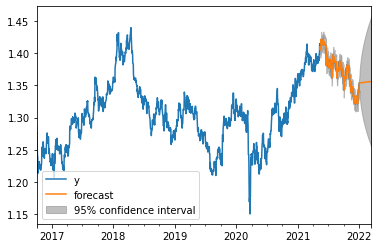

In [154]:
from sklearn import metrics
from matplotlib import pyplot
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA

# Split data into train and test sets
train_size = int(0.8 * len(df))
endog = df['y']
train, test = endog[:train_size], endog[train_size:]

# Fit ARIMA model
model = sm.tsa.arima.ARIMA(endog, order=(1, 1, 1), trend='t', missing='drop', exog=None)
model_fit = model.fit()

# Plotting the graph with AUD rates
fig, ax = plt.subplots()
ax = endog.loc['2016-10-03':].plot(ax=ax)
plot_predict(model_fit, '2021-05-13', '2022-03-13', ax=ax)
plt.show()


In [ ]:

# Forecast test set
forecast = model_fit.forecast(steps=len(test))
y_pred = model_fit.forecast(steps=len(test))

# Calculate and print RMSE
rmse = np.sqrt(np.mean((y_pred - test.values)**2))
print(f'RMSE: {rmse:.2f}')

RMSE: 0.02


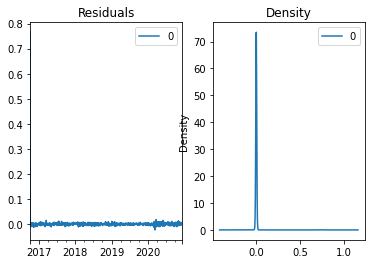

In [ ]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()